# Implementação de rede neural com back-propagation para problema simples de regressão

Baseado no tutorial ["How to Code a Neural Network with Backpropagation In Python (from scratch)"](https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/).


In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

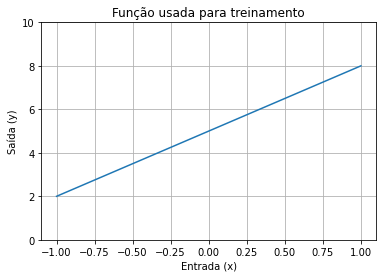

In [2]:
# Função que vamos tentar aproximar
x = np.linspace(-1,1,100)
y = lambda value: 3*value+5

plt.figure()
plt.title("Função usada para treinamento")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.ylim([0,10])
plt.grid()
plt.plot(x,y(x))
plt.show()

In [3]:
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

def print_net(net):
    for i, layer in enumerate(net):
        print("Camada {}".format(i+1) if i==0 else "Camada de saída")
        for j, neuron in enumerate(layer):
            output = ", Saída: {}".format(neuron["output"]) if "output" in neuron else ""
            delta = ", Delta (erro): {}".format(neuron["delta"]) if "delta" in neuron else ""
            print("Neurônio {}, Pesos + Bias: ".format(j), neuron["weights"], output, delta)

net = initialize_network(1, 5, 1)
print_net(net)

Camada 1
Neurônio 0, Pesos + Bias:  [0.8387821459620931, 0.3721170327691471]  
Neurônio 1, Pesos + Bias:  [0.3099255337682032, 0.3378942327484268]  
Neurônio 2, Pesos + Bias:  [0.0718153494435102, 0.3626963932041595]  
Neurônio 3, Pesos + Bias:  [0.9527834187519577, 0.2161376871520767]  
Neurônio 4, Pesos + Bias:  [0.7531997783686633, 0.09626728092232739]  
Camada de saída
Neurônio 0, Pesos + Bias:  [0.056328310063424536, 0.4331774065048304, 0.3797844480285988, 0.33826644693957697, 0.48976381438840766, 0.04831888804510176]  


In [4]:
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

weights = np.array([2, 4]) # O último é o bias
input = np.array([2])
print("Somatório neurônio: ", activate(weights, input))

Somatório neurônio:  8


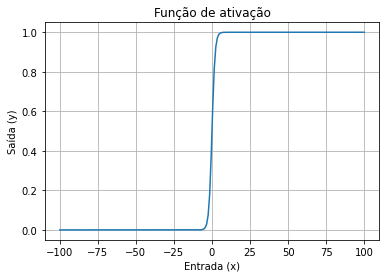

In [5]:
def transfer(activation):
	return 1.0 / (1.0 + np.exp(-activation))

plt.figure()
x_transfer = np.linspace(-100,100,200)
y_transfer = transfer(x_transfer)
plt.title("Função de ativação")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.grid()
plt.plot(x_transfer,y_transfer)
plt.show()

In [6]:
#Remover função de ativação da ultima camada se formmos fazer regressão
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
	
output = forward_propagate(net, input)
print ("Saída da rede neural:", output)

Saída da rede neural: [0.7954304047543321]


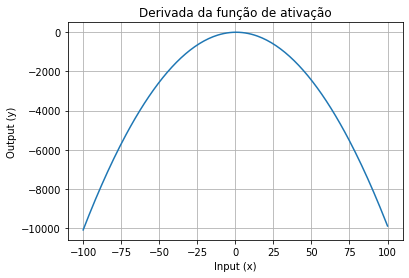

In [7]:
def transfer_derivative(output):
	return output * (1.0 - output)

plt.figure()
x_transfer_derivative = np.linspace(-100,100,200)
y_transfer_derivative = transfer_derivative(x_transfer_derivative)
plt.title("Derivada da função de ativação")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.grid()
plt.plot(x_transfer_derivative,y_transfer_derivative)
plt.show()

In [8]:
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

print(input)
expected = y(input)
backward_propagate_error(net, expected)
print_net(net)

[2]
Camada 1
Neurônio 0, Pesos + Bias:  [0.8387821459620931, 0.3721170327691471] , Saída: 0.8859154143931048 , Delta (erro): 0.00945331032436087
Neurônio 1, Pesos + Bias:  [0.3099255337682032, 0.3378942327484268] , Saída: 0.7226701496537555 , Delta (erro): 0.1441585799959392
Neurônio 2, Pesos + Bias:  [0.0718153494435102, 0.3626963932041595] , Saída: 0.6239450652105609 , Delta (erro): 0.14796969830160056
Neurônio 3, Pesos + Bias:  [0.9527834187519577, 0.2161376871520767] , Saída: 0.8929949145013761 , Delta (erro): 0.05367231047159552
Neurônio 4, Pesos + Bias:  [0.7531997783686633, 0.09626728092232739] , Saída: 0.8323907825217791 , Delta (erro): 0.11346183966086852
Camada de saída
Neurônio 0, Pesos + Bias:  [0.056328310063424536, 0.4331774065048304, 0.3797844480285988, 0.33826644693957697, 0.48976381438840766, 0.04831888804510176] , Saída: 0.7954304047543321 , Delta (erro): 1.66049650319735


In [12]:
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[-1:]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

learning_rate = 0.3
update_weights(net, input, learning_rate)
print_net(net)

Camada 1
Neurônio 0, Pesos + Bias:  [0.8444541321567096, 0.37495302586645535] , Saída: 0.8859154143931048 , Delta (erro): 0.00945331032436087
Neurônio 1, Pesos + Bias:  [0.3964206817657667, 0.38114180674720854] , Saída: 0.7226701496537555 , Delta (erro): 0.1441585799959392
Neurônio 2, Pesos + Bias:  [0.16059716842447053, 0.40708730269463966] , Saída: 0.6239450652105609 , Delta (erro): 0.14796969830160056
Neurônio 3, Pesos + Bias:  [0.984986805034915, 0.23223938029355537] , Saída: 0.8929949145013761 , Delta (erro): 0.05367231047159552
Neurônio 4, Pesos + Bias:  [0.8212768821651844, 0.13030583282058794] , Saída: 0.8323907825217791 , Delta (erro): 0.11346183966086852
Camada de saída
Neurônio 0, Pesos + Bias:  [0.49764614438193905, 0.7931747834443803, 0.6906020277194125, 0.7831109268103424, 0.9044184094897436, 0.5464678390043067] , Saída: 0.7954304047543321 , Delta (erro): 1.66049650319735


In [ ]:
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs